In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"D:\for ML\HW-hack\train_hw.csv", sep=';')

In [3]:
data.head(10)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
5,15/9-13,495.288,437641.96875,6470972.5,-470.261780,NORDLAND GP.,NaN,19.453100,NaN,1.585567,...,75.281410,NaN,NaN,-0.601600,NaN,NaN,NaN,NaN,65000,1.0
6,15/9-13,495.440,437641.96875,6470972.5,-470.413788,NORDLAND GP.,NaN,19.462496,NaN,1.576569,...,76.199951,NaN,NaN,-0.598369,NaN,NaN,NaN,NaN,65000,1.0
7,15/9-13,495.592,437641.96875,6470972.5,-470.565796,NORDLAND GP.,NaN,19.468800,NaN,1.587011,...,76.199951,NaN,NaN,-0.602039,NaN,NaN,NaN,NaN,65000,1.0
8,15/9-13,495.744,437641.96875,6470972.5,-470.717773,NORDLAND GP.,NaN,19.468800,NaN,1.613674,...,75.898796,NaN,NaN,-0.614364,NaN,NaN,NaN,NaN,65000,1.0
9,15/9-13,495.896,437641.96875,6470972.5,-470.869781,NORDLAND GP.,NaN,19.468800,NaN,1.634622,...,68.121262,NaN,NaN,-0.621813,NaN,NaN,NaN,NaN,65000,1.0


In [4]:
# data.info()

In [5]:
# data.isna().sum()

In [6]:
# plt.scatter(data['X_LOC'], data['Y_LOC'])

In [7]:
x_train_no_cor = data.dropna(subset=['X_LOC', 'Y_LOC', 'GROUP']).drop(['FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE'], axis=1)
x_train_no_cor = x_train_no_cor.loc[x_train_no_cor['GROUP'] != 'NORDLAND GP.']
x_train_no_cor = x_train_no_cor.reset_index(drop=True)
# x_train_no_cor.isna().any()

In [8]:
# x_train_no_cor.info()

In [9]:
x_train_no_cor.isna().sum()

WELL              0
DEPTH_MD          0
X_LOC             0
Y_LOC             0
Z_LOC             0
GROUP             0
FORMATION     54632
CALI          67377
RSHA         477443
RMED          22595
RDEP            240
RHOB         102603
GR                0
SGR          985469
NPHI         311333
PEF          425583
DTC           59668
SP           280940
BS           429828
ROP          590850
DTS          877321
DCAL         778433
DRHO         124810
MUDWEIGHT    785630
RMIC         873816
ROPA         864324
RXO          748226
dtype: int64

In [10]:
# x_train_no_cor[['X_LOC', 'Y_LOC']]

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=10).fit(x_train_no_cor[['X_LOC', 'Y_LOC']])

In [12]:
# kmeans.labels_

In [13]:
# x_train_no_cor['ZONE']=kmeans.labels_
x_train_no_cor.insert(0, "ZONE", kmeans.labels_)

In [14]:
# x_train_no_cor

In [15]:
# plt.scatter(data['X_LOC'], data['Y_LOC'], c='ZONE')

In [16]:
# import seaborn as sns

In [17]:
# sns.scatterplot(data=x_train_no_cor, x="X_LOC", y="Y_LOC", hue='ZONE')

In [18]:
# x_train_no_cor_tmp = x_train_no_cor.drop(['WELL', 'GROUP', 'FORMATION', 'X_LOC', 'Y_LOC'], axis=1)

In [19]:
# x_train_no_cor_tmp.groupby(['ZONE', 'FORCE_2020_LITHOFACIES_LITHOLOGY'])
# x_train_no_cor_tmp

NameError: name 'sns' is not defined

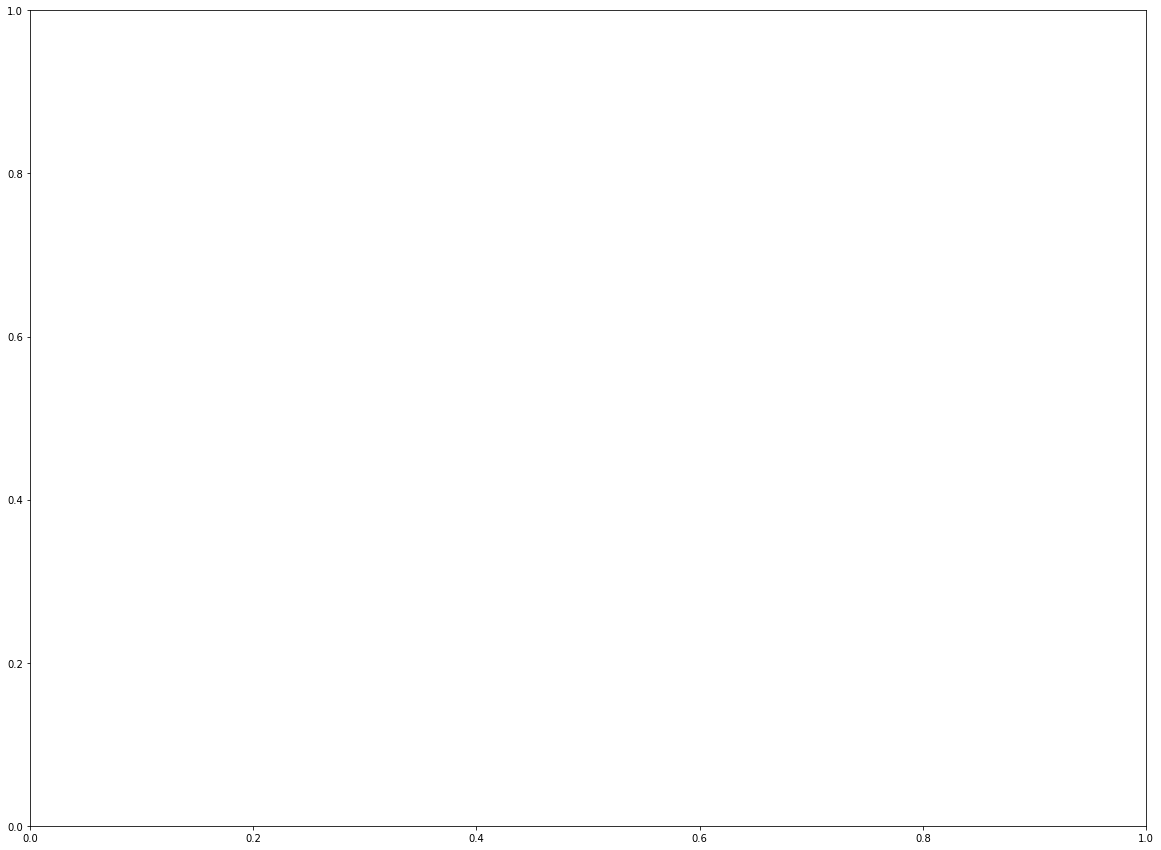

In [77]:
ax = plt.subplots(figsize=(20,15))
sns.heatmap(x_train_no_cor.drop(['WELL', 'GROUP', 'FORMATION', 'X_LOC', 'Y_LOC'], axis=1))

In [21]:
x_train_no_cor = x_train_no_cor.drop(['X_LOC', 'Y_LOC', 'SGR', 'BS', 'ROP', 'DTS', 'DCAL', 'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO', 'RSHA', 'PEF'], axis=1)

In [22]:
x_train_no_cor

,ZONE,WELL,DEPTH_MD,Z_LOC,GROUP,FORMATION,CALI,RMED,RDEP,RHOB,GR,NPHI,DTC,SP,DRHO
0,0,15/9-13,1143.1120,-1118.063232,HORDALAND GP.,Utsira Fm.,18.375000,1.069017,1.144099,1.784371,64.467834,0.478446,147.112793,44.992882,-0.002985
1,0,15/9-13,1143.2640,-1118.215210,HORDALAND GP.,Utsira Fm.,18.278408,1.068086,1.106831,1.785219,60.618687,0.467138,147.204041,45.144585,-0.003842
2,0,15/9-13,1143.4160,-1118.367188,HORDALAND GP.,Utsira Fm.,18.658718,1.039512,1.075497,1.791702,56.049240,0.450442,147.278687,43.581387,-0.000292
3,0,15/9-13,1143.5680,-1118.519165,HORDALAND GP.,Utsira Fm.,19.431723,0.975084,1.051254,1.791734,48.986870,0.463271,147.195480,41.952839,0.022891
4,0,15/9-13,1143.7200,-1118.671143,HORDALAND GP.,Utsira Fm.,19.159428,0.916610,1.035293,1.760523,42.177128,0.491838,147.240479,40.295490,0.044334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049964,0,7/1-2 S,3168.0964,-3107.236816,VESTLAND GP.,Bryne Fm.,8.401408,1.373446,1.077632,2.417872,50.962151,NaN,NaN,NaN,-0.026998
1049965,0,7/1-2 S,3168.2484,-3107.388672,VESTLAND GP.,Bryne Fm.,8.399204,1.060260,0.985221,2.408293,63.437672,NaN,NaN,NaN,-0.020138
1049966,0,7/1-2 S,3168.4004,-3107.540771,VESTLAND GP.,Bryne Fm.,8.391429,0.834281,0.897263,2.397462,63.249226,NaN,NaN,NaN,-0.007074
1049967,0,7/1-2 S,3168.5524,-3107.692871,VESTLAND GP.,Bryne Fm.,8.395998,0.835755,0.875619,2.383679,49.717674,NaN,NaN,NaN,0.007387


In [23]:
# x_train_no_cor = x_train_no_cor.reset_index(drop=True)

In [24]:
# x_train_no_cor

In [25]:
# x_train_no_cor = pd.DataFrame(x_train_no_cor[['ZONE', 'CALI', 'WELL', 'DEPTH_MD', 'Z_LOC', 'GROUP', 'FORMATION', 'RMED', 'RDEP', 'RHOB', 'NPHI', 'DTC', 'SP', 'DRHO']], 
                              #columns=['ZONE', 'CALI', 'WELL', 'DEPTH_MD', 'Z_LOC', 'GROUP', 'FORMATION', 'RMED', 'RDEP', 'RHOB', 'NPHI', 'DTC', 'SP', 'DRHO'])

In [26]:
# x_train_no_cor

In [27]:
x_train_no_cor.isna().sum()

ZONE              0
WELL              0
DEPTH_MD          0
Z_LOC             0
GROUP             0
FORMATION     54632
CALI          67377
RMED          22595
RDEP            240
RHOB         102603
GR                0
NPHI         311333
DTC           59668
SP           280940
DRHO         124810
dtype: int64

In [28]:
x_train_no_cor_copy = x_train_no_cor.copy(deep=True)

In [29]:
x_train_no_cor_copy.isna().sum()

ZONE              0
WELL              0
DEPTH_MD          0
Z_LOC             0
GROUP             0
FORMATION     54632
CALI          67377
RMED          22595
RDEP            240
RHOB         102603
GR                0
NPHI         311333
DTC           59668
SP           280940
DRHO         124810
dtype: int64

In [30]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge

# imp = IterativeImputer(random_state=0, max_iter=2, estimator=KNeighborsRegressor(n_neighbors=15, n_jobs=6))
imp = IterativeImputer(random_state=0, max_iter=45, estimator=BayesianRidge())
imp.fit(x_train_no_cor_copy[['CALI', 'RMED', 'RDEP', 'RHOB', 'NPHI', 'DTC', 'SP', 'DRHO']])

C:\Users\fedor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\impute\_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


IterativeImputer(estimator=BayesianRidge(), max_iter=45, random_state=0)

In [31]:
x_train_no_cor_copy = pd.DataFrame(imp.transform(x_train_no_cor_copy[['CALI', 'RMED', 'RDEP', 'RHOB', 'NPHI', 'DTC', 'SP', 'DRHO']]), columns=['CALI', 'RMED', 'RDEP', 'RHOB', 'NPHI', 'DTC', 'SP', 'DRHO'])

In [32]:
x_train_no_cor_copy.isna().sum()

CALI    0
RMED    0
RDEP    0
RHOB    0
NPHI    0
DTC     0
SP      0
DRHO    0
dtype: int64

In [33]:
x_train_no_cor_copy

,CALI,RMED,RDEP,RHOB,NPHI,DTC,SP,DRHO
0,18.375000,1.069017,1.144099,1.784371,0.478446,147.112793,44.992882,-0.002985
1,18.278408,1.068086,1.106831,1.785219,0.467138,147.204041,45.144585,-0.003842
2,18.658718,1.039512,1.075497,1.791702,0.450442,147.278687,43.581387,-0.000292
3,19.431723,0.975084,1.051254,1.791734,0.463271,147.195480,41.952839,0.022891
4,19.159428,0.916610,1.035293,1.760523,0.491838,147.240479,40.295490,0.044334
...,...,...,...,...,...,...,...,...
1049964,8.401408,1.373446,1.077632,2.417872,0.280338,93.385298,69.673850,-0.026998
1049965,8.399204,1.060260,0.985221,2.408293,0.283639,94.297847,69.298958,-0.020138
1049966,8.391429,0.834281,0.897263,2.397462,0.287505,95.336611,68.559945,-0.007074
1049967,8.395998,0.835755,0.875619,2.383679,0.292430,96.650749,67.702344,0.007387


In [34]:
x_train_no_cor[['CALI', 'RMED', 'RDEP', 'RHOB', 'NPHI', 'DTC', 'SP', 'DRHO']] = x_train_no_cor_copy[['CALI', 'RMED', 'RDEP', 'RHOB', 'NPHI', 'DTC', 'SP', 'DRHO']]

In [35]:
x_train_no_cor.isna().sum()

ZONE             0
WELL             0
DEPTH_MD         0
Z_LOC            0
GROUP            0
FORMATION    54632
CALI             0
RMED             0
RDEP             0
RHOB             0
GR               0
NPHI             0
DTC              0
SP               0
DRHO             0
dtype: int64

In [36]:
x_train_no_cor

,ZONE,WELL,DEPTH_MD,Z_LOC,GROUP,FORMATION,CALI,RMED,RDEP,RHOB,GR,NPHI,DTC,SP,DRHO
0,0,15/9-13,1143.1120,-1118.063232,HORDALAND GP.,Utsira Fm.,18.375000,1.069017,1.144099,1.784371,64.467834,0.478446,147.112793,44.992882,-0.002985
1,0,15/9-13,1143.2640,-1118.215210,HORDALAND GP.,Utsira Fm.,18.278408,1.068086,1.106831,1.785219,60.618687,0.467138,147.204041,45.144585,-0.003842
2,0,15/9-13,1143.4160,-1118.367188,HORDALAND GP.,Utsira Fm.,18.658718,1.039512,1.075497,1.791702,56.049240,0.450442,147.278687,43.581387,-0.000292
3,0,15/9-13,1143.5680,-1118.519165,HORDALAND GP.,Utsira Fm.,19.431723,0.975084,1.051254,1.791734,48.986870,0.463271,147.195480,41.952839,0.022891
4,0,15/9-13,1143.7200,-1118.671143,HORDALAND GP.,Utsira Fm.,19.159428,0.916610,1.035293,1.760523,42.177128,0.491838,147.240479,40.295490,0.044334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049964,0,7/1-2 S,3168.0964,-3107.236816,VESTLAND GP.,Bryne Fm.,8.401408,1.373446,1.077632,2.417872,50.962151,0.280338,93.385298,69.673850,-0.026998
1049965,0,7/1-2 S,3168.2484,-3107.388672,VESTLAND GP.,Bryne Fm.,8.399204,1.060260,0.985221,2.408293,63.437672,0.283639,94.297847,69.298958,-0.020138
1049966,0,7/1-2 S,3168.4004,-3107.540771,VESTLAND GP.,Bryne Fm.,8.391429,0.834281,0.897263,2.397462,63.249226,0.287505,95.336611,68.559945,-0.007074
1049967,0,7/1-2 S,3168.5524,-3107.692871,VESTLAND GP.,Bryne Fm.,8.395998,0.835755,0.875619,2.383679,49.717674,0.292430,96.650749,67.702344,0.007387


In [37]:
from itertools import takewhile
from collections import Counter

def mode(x):
    most_common = Counter(x).most_common()
    if not most_common:
        return []
    else:
        max_count = most_common[0][1]
        return [x for x, count in takewhile(lambda x: x[1]==max_count, most_common)]

In [38]:
# x_train_no_cor['GROUP'].dropna().unique()

In [39]:
# x_train_no_cor.at[97517, 'GROUP']
# type(x_train_no_cor.at[97517, 'GROUP'])

In [40]:
x_train_no_cor['FORMATION']

0          Utsira Fm.
1          Utsira Fm.
2          Utsira Fm.
3          Utsira Fm.
4          Utsira Fm.
              ...    
1049964     Bryne Fm.
1049965     Bryne Fm.
1049966     Bryne Fm.
1049967     Bryne Fm.
1049968     Bryne Fm.
Name: FORMATION, Length: 1049969, dtype: object

In [41]:
# x_train_no_cor = x_train_no_cor.loc[x_train_no_cor['GROUP'] != 'NORDLAND GP.']

In [42]:
x_train_no_cor.isna().sum()

ZONE             0
WELL             0
DEPTH_MD         0
Z_LOC            0
GROUP            0
FORMATION    54632
CALI             0
RMED             0
RDEP             0
RHOB             0
GR               0
NPHI             0
DTC              0
SP               0
DRHO             0
dtype: int64

In [43]:
import statistics

# formations = []
top_formations_in_groups = []
formations_nordland = []
#flag_list = x_train_no_cor['FORMATION'].isna().tolist()
# top_formations_in_groups_self_mode = []
for grp in x_train_no_cor['GROUP'].dropna().unique():
    formations = []
    c = 0
    for frm in x_train_no_cor['FORMATION']:
        #if (x_train_no_cor.at[c, 'GROUP'] == grp):
        #if (x_train_no_cor.iloc[c]['GROUP'] == grp):
        if x_train_no_cor['GROUP'].values[c] == grp:
        # if x_train_no_cor['GROUP'].values[c] != 'NORDLAND GP.' and (x_train_no_cor['GROUP'].values[c] == grp):
            formations.append(frm)
        # if x_train_no_cor['GROUP'].values[c] == 'NORDLAND GP.' and flag_list[c] == False:
            # formations_nordland.append(frm)
        c += 1
    top_formations_in_groups.append(statistics.mode(formations))
    print(top_formations_in_groups[-1])
    # top_formations_in_groups_self_mode.append(mode(formations))
top_formations_in_groups

# top = x_train['FORMATION'].describe()['top']
# x_train['FORMATION'] = x_train['FORMATION'].fillna(top)

Utsira Fm.
Lista Fm.
Kyrre Fm.
Roedby Fm.
Heather Fm.
Sleipner Fm.
Smith Bank Fm.
Skagerrak Fm.
Kupferschiefer Fm.
Mandal Fm.
Smith Bank Fm.
Statfjord Fm.
Ness Fm.


['Utsira Fm.',
 'Lista Fm.',
 'Kyrre Fm.',
 'Roedby Fm.',
 'Heather Fm.',
 'Sleipner Fm.',
 'Smith Bank Fm.',
 'Skagerrak Fm.',
 'Kupferschiefer Fm.',
 'Mandal Fm.',
 'Smith Bank Fm.',
 'Statfjord Fm.',
 'Ness Fm.']

In [44]:
x_train_no_cor['FORMATION'].describe()['top']

'Utsira Fm.'

In [45]:
formation_recovery_mode = dict(zip(x_train_no_cor['GROUP'].dropna().unique(), top_formations_in_groups))

In [46]:
formation_recovery_mode

{'HORDALAND GP.': 'Utsira Fm.',
 'ROGALAND GP.': 'Lista Fm.',
 'SHETLAND GP.': 'Kyrre Fm.',
 'CROMER KNOLL GP.': 'Roedby Fm.',
 'VIKING GP.': 'Heather Fm.',
 'VESTLAND GP.': 'Sleipner Fm.',
 'ZECHSTEIN GP.': 'Smith Bank Fm.',
 'HEGRE GP.': 'Skagerrak Fm.',
 'ROTLIEGENDES GP.': 'Kupferschiefer Fm.',
 'TYNE GP.': 'Mandal Fm.',
 'BOKNFJORD GP.': 'Smith Bank Fm.',
 'DUNLIN GP.': 'Statfjord Fm.',
 'BAAT GP.': 'Ness Fm.'}

In [47]:
x_train_no_cor['FORMATION'].values[0]

'Utsira Fm.'

In [48]:
# x_train_no_cor['FORMATION'].isna().tolist()[-1]

In [49]:
# len(x_train_no_cor.index)

In [50]:
# group_recovery_mode = dict(zip(top_formations_in_groups, x_train_no_cor['GROUP'].dropna().unique()))

In [51]:
# group_recovery_mode

In [52]:
x_train_no_cor['GROUP'].isna().sum()

0

In [53]:
'''
c = 0
flags_list = x_train_no_cor['GROUP'].isna().tolist()
for grp in x_train_no_cor['GROUP']:
    if flags_list[c] == True:
        x_train_no_cor['GROUP'].values[c] = group_recovery_mode[x_train_no_cor['FORMATION'].values[c]]
c += 1
'''

"\nc = 0\nflags_list = x_train_no_cor['GROUP'].isna().tolist()\nfor grp in x_train_no_cor['GROUP']:\n    if flags_list[c] == True:\n        x_train_no_cor['GROUP'].values[c] = group_recovery_mode[x_train_no_cor['FORMATION'].values[c]]\nc += 1\n"

In [54]:
# x_train_no_cor = x_train_no_cor.dropna(subset=['GROUP'])

In [55]:
c = 0
flags_list = x_train_no_cor['FORMATION'].isna().tolist()
# for frm in x_train_no_cor['FORMATION']:
for frm in range(0, len(x_train_no_cor.index)):
    #if x_train_no_cor['FORMATION'].values[c] == 'nan':
    #if x_train_no_cor['FORMATION'].values[c]== x_train_no_cor['FORMATION'].isna().tolist()[c]:
    if flags_list[c] == True:
        # x_train_no_cor['FORMATION'].values[c] = formation_recovery_mode[frm]
        x_train_no_cor['FORMATION'].values[c] = formation_recovery_mode[x_train_no_cor['GROUP'].values[c]]
        # if((c % 10000) == 0):
            # print(x_train_no_cor['FORMATION'].values[c])
    c += 1

In [56]:
x_train_no_cor['FORMATION'].isna().sum()

0

In [57]:
x_train_no_cor.isna().sum()

ZONE         0
WELL         0
DEPTH_MD     0
Z_LOC        0
GROUP        0
FORMATION    0
CALI         0
RMED         0
RDEP         0
RHOB         0
GR           0
NPHI         0
DTC          0
SP           0
DRHO         0
dtype: int64

In [58]:
# x_train_no_cor.info()

In [59]:
# data.dropna(subset=['X_LOC', 'Y_LOC']).info()

**Привожу DataFrame к виду, с которым работал для множества "x_train_no_cor"**

In [60]:
data_c = data.dropna(subset=['X_LOC', 'Y_LOC', 'GROUP']).copy(deep=True)
data_c = data_c.loc[data_c['GROUP'] != 'NORDLAND GP.']
data_c = data_c.reset_index(drop=True)
data_c

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,1143.1120,437640.8125,6470976.0,-1118.063232,HORDALAND GP.,Utsira Fm.,18.375000,NaN,1.069017,...,143.330673,NaN,NaN,-0.002985,0.131809,NaN,NaN,NaN,65000,1.0
1,15/9-13,1143.2640,437640.8125,6470976.0,-1118.215210,HORDALAND GP.,Utsira Fm.,18.278408,NaN,1.068086,...,448.720093,NaN,NaN,-0.003842,0.131809,NaN,NaN,NaN,65000,1.0
2,15/9-13,1143.4160,437640.8125,6470976.0,-1118.367188,HORDALAND GP.,Utsira Fm.,18.658718,NaN,1.039512,...,498.149078,NaN,NaN,-0.000292,0.131809,NaN,NaN,NaN,65000,1.0
3,15/9-13,1143.5680,437640.8125,6470976.0,-1118.519165,HORDALAND GP.,Utsira Fm.,19.431723,NaN,0.975084,...,499.783722,NaN,NaN,0.022891,0.131809,NaN,NaN,NaN,65000,1.0
4,15/9-13,1143.7200,437640.8125,6470976.0,-1118.671143,HORDALAND GP.,Utsira Fm.,19.159428,NaN,0.916610,...,539.977722,NaN,NaN,0.044334,0.131809,NaN,NaN,NaN,30000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049964,7/1-2 S,3168.0964,444920.3750,6421578.5,-3107.236816,VESTLAND GP.,Bryne Fm.,8.401408,1.230462,1.373446,...,28.639730,NaN,NaN,-0.026998,NaN,NaN,25.384022,NaN,30000,2.0
1049965,7/1-2 S,3168.2484,444920.3750,6421578.5,-3107.388672,VESTLAND GP.,Bryne Fm.,8.399204,0.965972,1.060260,...,28.984997,NaN,NaN,-0.020138,NaN,NaN,25.548296,NaN,65030,2.0
1049966,7/1-2 S,3168.4004,444920.3750,6421578.5,-3107.540771,VESTLAND GP.,Bryne Fm.,8.391429,0.789153,0.834281,...,29.017000,NaN,NaN,-0.007074,NaN,NaN,25.706392,NaN,65030,2.0
1049967,7/1-2 S,3168.5524,444920.3750,6421578.5,-3107.692871,VESTLAND GP.,Bryne Fm.,8.395998,0.840378,0.835755,...,28.653328,NaN,NaN,0.007387,NaN,NaN,25.864508,NaN,65030,2.0


In [61]:
# y_train = data.FORCE_2020_LITHOFACIES_LITHOLOGY
y_train = data_c['FORCE_2020_LITHOFACIES_LITHOLOGY']
# x_train = data.drop(['FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE'], axis=1)
#x_train = data.drop(['FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE', 'SGR', 'DCAL', 'ROPA', 'RMIC', 'DTS'], axis=1)
y_train

0          65000
1          65000
2          65000
3          65000
4          30000
           ...  
1049964    30000
1049965    65030
1049966    65030
1049967    65030
1049968    30000
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, Length: 1049969, dtype: int64

In [62]:
# x_train_no_cor

In [63]:
from sklearn.utils import shuffle

# x_train, y_train = shuffle(x_train, y_train, random_state=42)
x_train_no_cor, y_train = shuffle(x_train_no_cor, y_train, random_state=42)

In [64]:
x_train_no_cor

,ZONE,WELL,DEPTH_MD,Z_LOC,GROUP,FORMATION,CALI,RMED,RDEP,RHOB,GR,NPHI,DTC,SP,DRHO
823938,3,34/8-1,2278.289023,-2247.777832,SHETLAND GP.,Lista Fm.,13.184271,1.391328,1.137348,2.497047,68.582878,0.352733,107.479233,46.329250,-0.006592
36283,0,15/9-17,2547.533998,-2525.343994,SHETLAND GP.,Tor Fm.,12.438000,4.933249,4.204113,2.560086,10.381619,0.163925,67.144447,36.840420,-0.011635
1008603,1,35/9-2,1905.832358,-1873.685059,SHETLAND GP.,Kyrre Fm.,12.555551,3.443376,2.454322,2.491921,87.638184,0.392348,85.631866,116.051033,0.006152
360332,2,25/8-5 S,2751.006400,-2517.002441,SHETLAND GP.,Tor Fm.,8.986394,4.380679,5.082558,2.435606,68.233116,0.130359,76.712453,83.289246,0.051513
959362,1,35/3-7 S,3852.267851,-3747.057861,CROMER KNOLL GP.,Agat Fm.,8.490282,4.151134,3.759997,2.580243,116.467209,0.199454,77.357185,72.969057,-0.003435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0,16/4-1,1643.401604,-1618.072266,HORDALAND GP.,Skade Fm.,15.048189,0.840201,0.756342,2.222784,90.781044,0.479934,146.291367,139.233063,0.004000
259178,2,25/4-5,1551.590805,-1526.290894,HORDALAND GP.,Grid Mb.,19.015350,1.058899,1.208520,2.021530,46.613598,0.514072,129.624191,41.753433,0.008566
131932,0,16/7-5,1069.367985,-1042.549927,HORDALAND GP.,Utsira Fm.,18.353703,1.075972,1.222545,1.963822,79.707062,0.530714,154.443985,50.644093,0.220071
671155,3,34/10-21,2124.386403,-2095.054199,SHETLAND GP.,Jorsalfare Fm.,14.758375,1.212967,1.157285,2.302094,50.331516,0.360930,112.950089,14.723917,0.002812


In [65]:
import numpy as np
import catboost

In [66]:
lithology_numbers = {30000: 0,
                 65030: 1,
                 65000: 2,
                 80000: 3,
                 74000: 4,
                 70000: 5,
                 70032: 6,
                 88000: 7,
                 86000: 8,
                 99000: 9,
                 90000: 10,
                 93000: 11}

In [67]:
y_train = y_train.map(lithology_numbers)
# y_train

In [68]:
# x_train.head(10)
# x_train_no_cor.head(10)

In [69]:
# x_train.info()
x_train_no_cor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049969 entries, 823938 to 121958
Data columns (total 15 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   ZONE       1049969 non-null  int32  
 1   WELL       1049969 non-null  object 
 2   DEPTH_MD   1049969 non-null  float64
 3   Z_LOC      1049969 non-null  float64
 4   GROUP      1049969 non-null  object 
 5   FORMATION  1049969 non-null  object 
 6   CALI       1049969 non-null  float64
 7   RMED       1049969 non-null  float64
 8   RDEP       1049969 non-null  float64
 9   RHOB       1049969 non-null  float64
 10  GR         1049969 non-null  float64
 11  NPHI       1049969 non-null  float64
 12  DTC        1049969 non-null  float64
 13  SP         1049969 non-null  float64
 14  DRHO       1049969 non-null  float64
dtypes: float64(11), int32(1), object(3)
memory usage: 124.2+ MB


In [70]:
'''
top = x_train['FORMATION'].describe()['top']
x_train['FORMATION'] = x_train['FORMATION'].fillna(top)
top = x_train['GROUP'].describe()['top']
x_train['GROUP'] = x_train['GROUP'].fillna(top)
x_train.tail(10)
'''

"\ntop = x_train['FORMATION'].describe()['top']\nx_train['FORMATION'] = x_train['FORMATION'].fillna(top)\ntop = x_train['GROUP'].describe()['top']\nx_train['GROUP'] = x_train['GROUP'].fillna(top)\nx_train.tail(10)\n"

In [71]:
# cat_features = [0, 5, 6]
cat_features = [1, 4, 5]
# cat_features = np.where(x_train.dtypes != float)[0]

In [72]:
# x_train.isna().any()
x_train_no_cor.isna().any()

ZONE         False
WELL         False
DEPTH_MD     False
Z_LOC        False
GROUP        False
FORMATION    False
CALI         False
RMED         False
RDEP         False
RHOB         False
GR           False
NPHI         False
DTC          False
SP           False
DRHO         False
dtype: bool

In [73]:
# from catboost import Pool
# pool = Pool(data=x_train, label=y_train, cat_features=cat_features)

In [74]:
'''
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
'''

'\nfrom sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\nx_train = scaler.fit_transform(x_train)\n'

In [75]:
from sklearn.model_selection import train_test_split

# x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, train_size=0.8, random_state=42)
x_train_no_cor, x_validation, y_train, y_validation = train_test_split(x_train_no_cor, y_train, train_size=0.8, random_state=42)

In [76]:
from catboost import CatBoostClassifier
# model = CatBoostClassifier(iterations=1000, learning_rate=0.5, use_best_model=True, logging_level='Verbose', task_type="GPU", loss_function='MultiClass')
model = CatBoostClassifier(iterations=1000, nan_mode="Min", random_seed=43, loss_function='MultiClass', task_type="GPU")
# model.fit(x_train, y_train, cat_features = cat_features, eval_set=(x_validation, y_validation), plot=True, verbose=False)
model.fit(x_train_no_cor, y_train, cat_features = cat_features, eval_set=(x_validation, y_validation), plot=True, verbose=False)
# cat_features = cat_features

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

KeyboardInterrupt: 

In [ ]:
model.get_feature_importance(prettified=True)

In [ ]:
import numpy as np
A=np.array([[0.   , 2.   , 3.5  , 3.   , 3.75 , 3.5  , 3.5  , 4.   , 4.   ,
        2.5  , 3.875, 3.25 ],
       [2.   , 0.   , 2.375, 2.75 , 4.   , 3.75 , 3.75 , 3.875, 4.   ,
        3.   , 3.75 , 3.   ],
       [3.5  , 2.375, 0.   , 2.   , 3.5  , 3.5  , 3.75 , 4.   , 4.   ,
        2.75 , 3.25 , 3.   ],
       [3.   , 2.75 , 2.   , 0.   , 2.5  , 2.   , 2.25 , 4.   , 4.   ,
        3.375, 3.75 , 3.25 ],
       [3.75 , 4.   , 3.5  , 2.5  , 0.   , 2.625, 2.875, 3.75 , 3.25 ,
        3.   , 4.   , 3.625],
       [3.5  , 3.75 , 3.5  , 2.   , 2.625, 0.   , 1.375, 4.   , 3.75 ,
        3.5  , 4.   , 3.625],
       [3.5  , 3.75 , 3.75 , 2.25 , 2.875, 1.375, 0.   , 4.   , 3.75 ,
        3.125, 4.   , 3.75 ],
       [4.   , 3.875, 4.   , 4.   , 3.75 , 4.   , 4.   , 0.   , 2.75 ,
        3.75 , 3.75 , 4.   ],
       [4.   , 4.   , 4.   , 4.   , 3.25 , 3.75 , 3.75 , 2.75 , 0.   ,
        4.   , 4.   , 3.875],
       [2.5  , 3.   , 2.75 , 3.375, 3.   , 3.5  , 3.125, 3.75 , 4.   ,
        0.   , 2.5  , 3.25 ],
       [3.875, 3.75 , 3.25 , 3.75 , 4.   , 4.   , 4.   , 3.75 , 4.   ,
        2.5  , 0.   , 4.   ],
       [3.25 , 3.   , 3.   , 3.25 , 3.625, 3.625, 3.75 , 4.   , 3.875,
        3.25 , 4.   , 0.   ]])

In [ ]:
def score(y_true, y_pred):
    S = 0.0
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)
    for i in range(0, y_true.shape[0]):
        S -= A[y_true[i], y_pred[i]]
    return S/y_true.shape[0]

In [ ]:
y_validation.values

In [ ]:
y_validation.shape[0]

In [ ]:
score(y_validation.values, y_validation.values)

In [ ]:
y_validation.values

In [ ]:
y_pred_test = model.predict(x_validation)

In [ ]:
y_pred_test

In [ ]:
score(y_validation.values, y_pred_test)